In [ ]:
import os
import sys

In [ ]:
REPO_ROOT = "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio"
sys.path.append(REPO_ROOT)

In [ ]:
from config import config
from optimisation.wandb_opt import WandbOptimisation
from pbenchmark.portfolio_benchmark import PortfolioBenchmark
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser
from visualiser.model_visualiser import ModelVisualiser

wandb: Currently logged in as: ingridpi (xdl-team) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
USE_CASE = "portfolio-optimisation"

In [ ]:
data_dir = f"{REPO_ROOT}/{config.DATA_DIR}/{config.DATASET_NAME}"
plot_dir = (
    f"{REPO_ROOT}/{config.PLOT_DIR}/{config.TICKERS_NAME}/{config.DATASET_NAME}"
)
models_dir = f"{REPO_ROOT}/{config.MODELS_DIR}/{USE_CASE}/{config.TICKERS_NAME}/{config.DATASET_NAME}"
results_dir = (
    f"{REPO_ROOT}/{config.RESULTS_DIR}/{USE_CASE}/{config.DATASET_NAME}"
)
logs_dir = f"{REPO_ROOT}/{config.LOGS_DIR}/{USE_CASE}/{config.TICKERS_NAME}/{config.DATASET_NAME}"

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [ ]:
finpreprocessor = FinancialDataPreprocessor(
    start_date=config.START_DATE,
    end_date=config.END_DATE,
)
train_val_data, trade_data = finpreprocessor.load_train_test_data(
    directory=data_dir,
    filename=config.TICKERS_NAME,
)

In [ ]:
# Split the training data into training and validation sets
train_data, val_data = finpreprocessor.split_train_test(
    data=train_val_data,
    test_start_date=config.VAL_START_DATE,
)

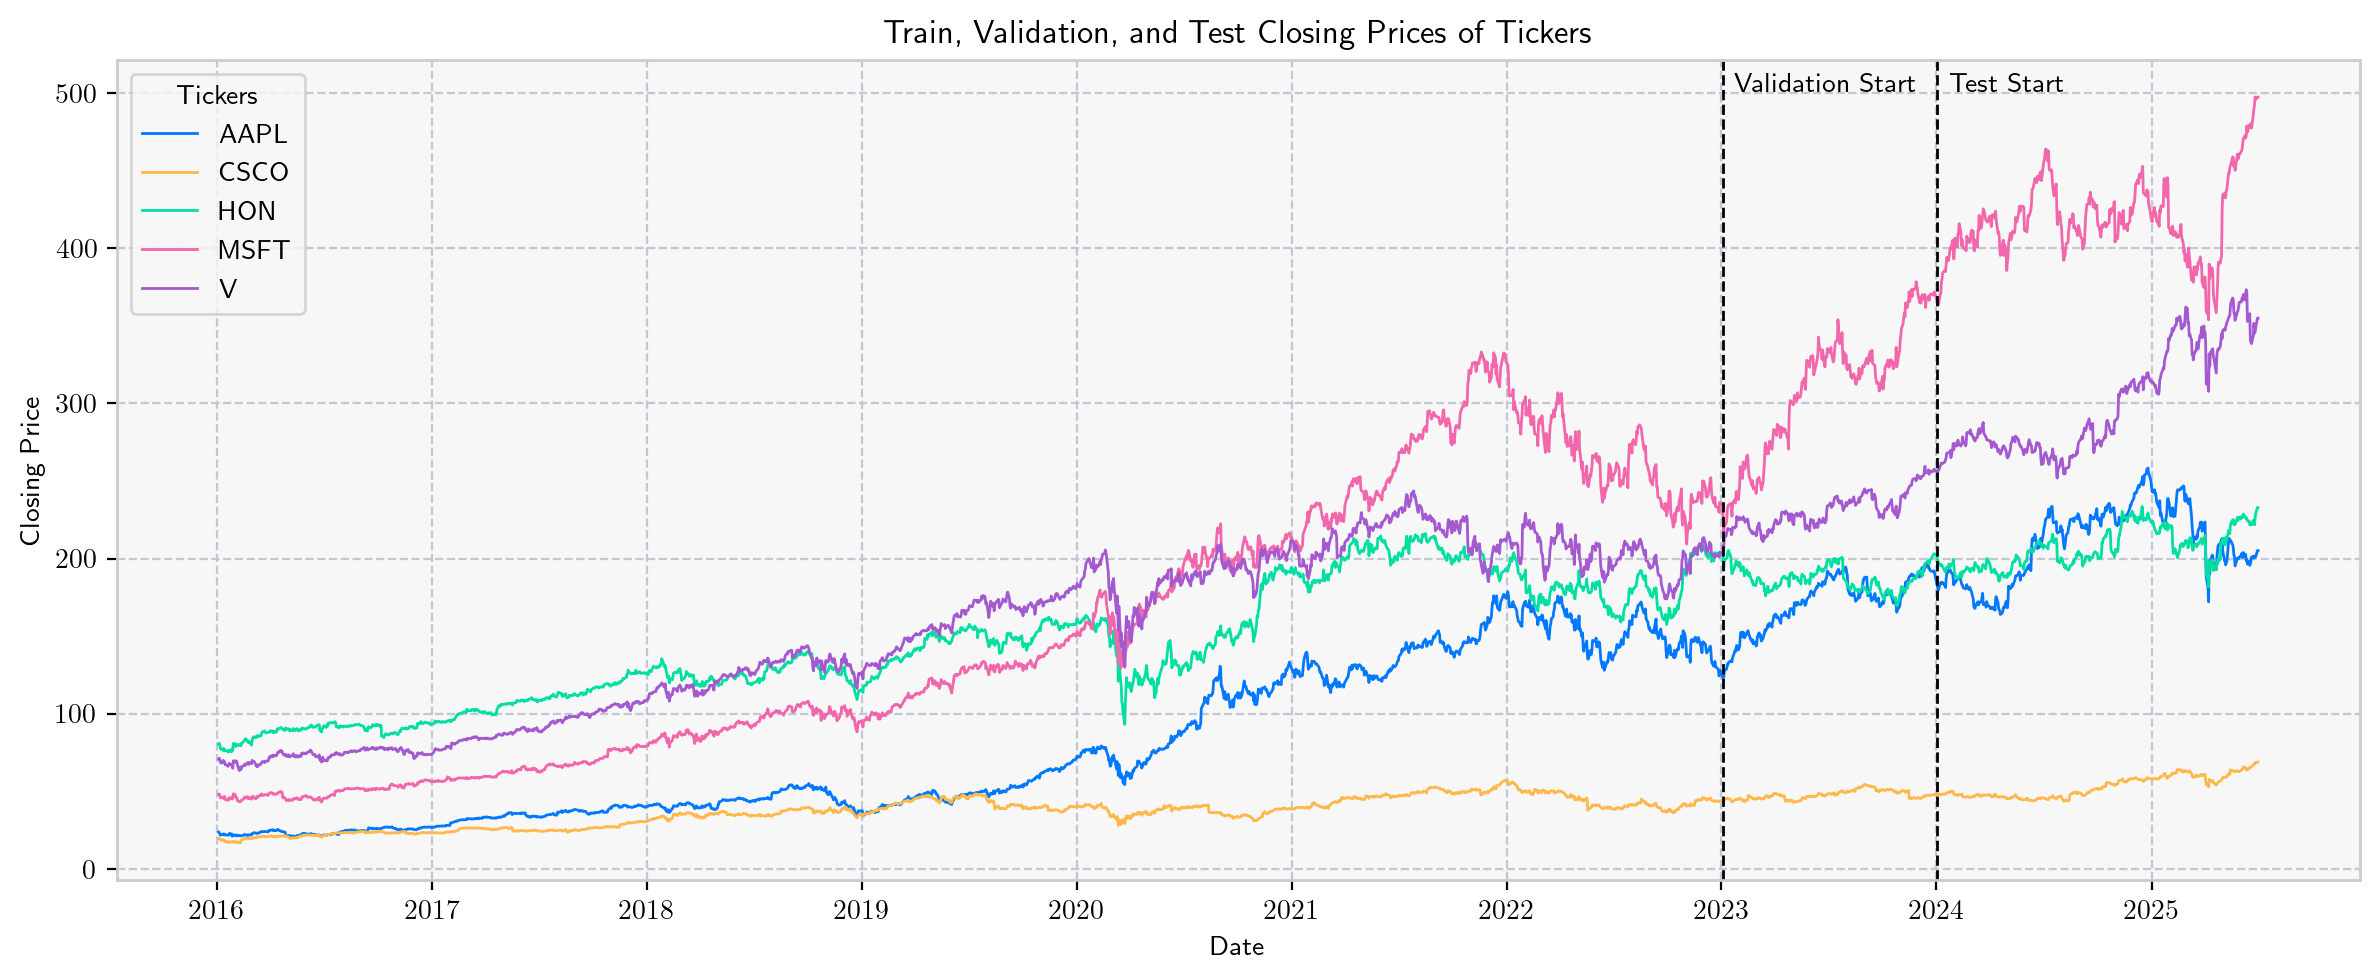

In [ ]:
visualiser = FinancialDataVisualiser(directory=plot_dir)
visualiser.plot_train_val_test_close_prices(
    train_data=train_data,
    val_data=val_data,
    test_data=trade_data,
)

In [ ]:
wandb_opt = WandbOptimisation(
    entity=config.WANDB_ENTITY,
    project=config.WANDB_PROJECT,
    train_data=train_data,
    val_data=val_data,
    test_data=trade_data,
    state_columns=config.ENVIRONMENT_COLUMNS,
)

In [ ]:
model_visualiser = ModelVisualiser(directory=plot_dir)
benchmark = PortfolioBenchmark()

In [ ]:
sweep_ids = {}
best_runs = {}
perf_stats = {}

In [ ]:
def perform_model_sweep(model_name: str):
    sweep_id = wandb_opt.sweep(
        config.SWEEP_CONFIG, model_name=model_name, number_trials=20
    )
    sweep_ids[model_name] = sweep_id

    run_id, configuration = wandb_opt.get_best_sweep(
        sweep_id=sweep_id, model_name=model_name
    )

    best_runs[model_name] = (run_id, configuration)

    df_account, df_actions = wandb_opt.test_best_run(
        model_name=model_name,
        configuration=configuration,
        train_val_data=train_val_data,
        logs_directory=logs_dir,
        models_directory=models_dir,
    )

    model_visualiser.evaluate_testing(
        model_name=model_name,
        account_data=df_account,
        actions_data=df_actions,
    )

    perf_stats_alg = benchmark.compute_perf_stats(df_account=df_account)
    perf_stats[model_name] = perf_stats_alg

## A2C


Create sweep with ID: ox0rqni3
Sweep URL: https://wandb.ai/xdl-team/xdl-portfolio/sweeps/ox0rqni3


wandb: Agent Starting Run: 2jevmfdl with config:
wandb: 	ent_coef: 0.0004078264399012749
wandb: 	learning_rate: 0.005479768021699295
wandb: 	n_steps: 10


wandb: Agent Starting Run: sgb9eixj with config:
wandb: 	ent_coef: 0.00018963339428395992
wandb: 	learning_rate: 0.00046062336967331454
wandb: 	n_steps: 30


wandb: Agent Starting Run: okp56est with config:
wandb: 	ent_coef: 0.0008022628197543823
wandb: 	learning_rate: 0.007633409811926704
wandb: 	n_steps: 40


wandb: Agent Starting Run: 0iyym2kz with config:
wandb: 	ent_coef: 0.0005777622244012319
wandb: 	learning_rate: 0.0006240691537857377
wandb: 	n_steps: 30


wandb: Agent Starting Run: uk9ielgg with config:
wandb: 	ent_coef: 2.439249307015205e-05
wandb: 	learning_rate: 0.0015525695244790311
wandb: 	n_steps: 20


wandb: Agent Starting Run: gf6goa3c with config:
wandb: 	ent_coef: 0.0009779500432385132
wandb: 	learning_rate: 0.003448565160332307
wandb: 	n_steps: 5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c010qe5v with config:
wandb: 	ent_coef: 0.0001093719705056609
wandb: 	learning_rate: 0.007876538445035367
wandb: 	n_steps: 20


wandb: Agent Starting Run: 5ge2dan3 with config:
wandb: 	ent_coef: 0.000376787575790944
wandb: 	learning_rate: 0.007846140902693598
wandb: 	n_steps: 20


wandb: Agent Starting Run: vfjn8x56 with config:
wandb: 	ent_coef: 0.00038239358300752943
wandb: 	learning_rate: 0.002631244013535495
wandb: 	n_steps: 30


wandb: Agent Starting Run: xu11daah with config:
wandb: 	ent_coef: 0.00044093271153222897
wandb: 	learning_rate: 0.0028055155094598265
wandb: 	n_steps: 30


wandb: Agent Starting Run: vvu3vdbp with config:
wandb: 	ent_coef: 0.0004896522974564386
wandb: 	learning_rate: 0.002925953290680318
wandb: 	n_steps: 20


wandb: Agent Starting Run: rua75c80 with config:
wandb: 	ent_coef: 0.0005034183321912225
wandb: 	learning_rate: 0.000560639470839195
wandb: 	n_steps: 10


wandb: Agent Starting Run: 42svtoq5 with config:
wandb: 	ent_coef: 0.0009929203090382251
wandb: 	learning_rate: 0.002181802523703927
wandb: 	n_steps: 5


wandb: Agent Starting Run: o92cq66u with config:
wandb: 	ent_coef: 0.0003833284546139188
wandb: 	learning_rate: 0.004075010342487967
wandb: 	n_steps: 10


wandb: Agent Starting Run: o4y31tru with config:
wandb: 	ent_coef: 0.00035654546503114634
wandb: 	learning_rate: 0.0033295162159402165
wandb: 	n_steps: 40


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5hd19fta with config:
wandb: 	ent_coef: 0.0007178125552956746
wandb: 	learning_rate: 0.008666415401405964
wandb: 	n_steps: 20


wandb: Agent Starting Run: 7a4a6dxg with config:
wandb: 	ent_coef: 0.0008253329258319552
wandb: 	learning_rate: 0.006114112091478021
wandb: 	n_steps: 20


wandb: Agent Starting Run: uqbh8roy with config:
wandb: 	ent_coef: 0.0005881708563501437
wandb: 	learning_rate: 0.0050235914927489085
wandb: 	n_steps: 20


wandb: Agent Starting Run: cbhlo0lo with config:
wandb: 	ent_coef: 0.0009894242567334175
wandb: 	learning_rate: 0.00025975415406286664
wandb: 	n_steps: 5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 06qy7hqi with config:
wandb: 	ent_coef: 0.00026550940923340566
wandb: 	learning_rate: 0.005370384181873416
wandb: 	n_steps: 5


Best run configuration:
	n_steps: 40
	ent_coef: 0.000357
	learning_rate: 0.003330
Best run metrics:
	sharpe_ratio: 2.1668
	cumulative_return: 0.3359
Environment successfully created with 
	Stock dimension: 5 
	State space: 4
Model arguments: {'n_steps': 40, 'ent_coef': 0.00035654546503114634, 'learning_rate': 0.0033295162159402165}
Using cpu device
Training model: A2C
day: 2011, episode: 10
begin_total_asset:100000.00
end_total_asset:445271.97
sharpe_ratio: 0.95
day: 2011, episode: 20
begin_total_asset:100000.00
end_total_asset:454150.98
sharpe_ratio: 0.97
day: 2011, episode: 30
begin_total_asset:100000.00
end_total_asset:547014.01
sharpe_ratio: 1.05
day: 2011, episode: 40
begin_total_asset:100000.00
end_total_asset:547014.01
sharpe_ratio: 1.05
day: 2011, episode: 50
begin_total_asset:100000.00
end_total_asset:547014.01
sharpe_ratio: 1.05
Saving model: A2C
Model saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/models/portfolio-optimisation/test/simple-dataset/a2

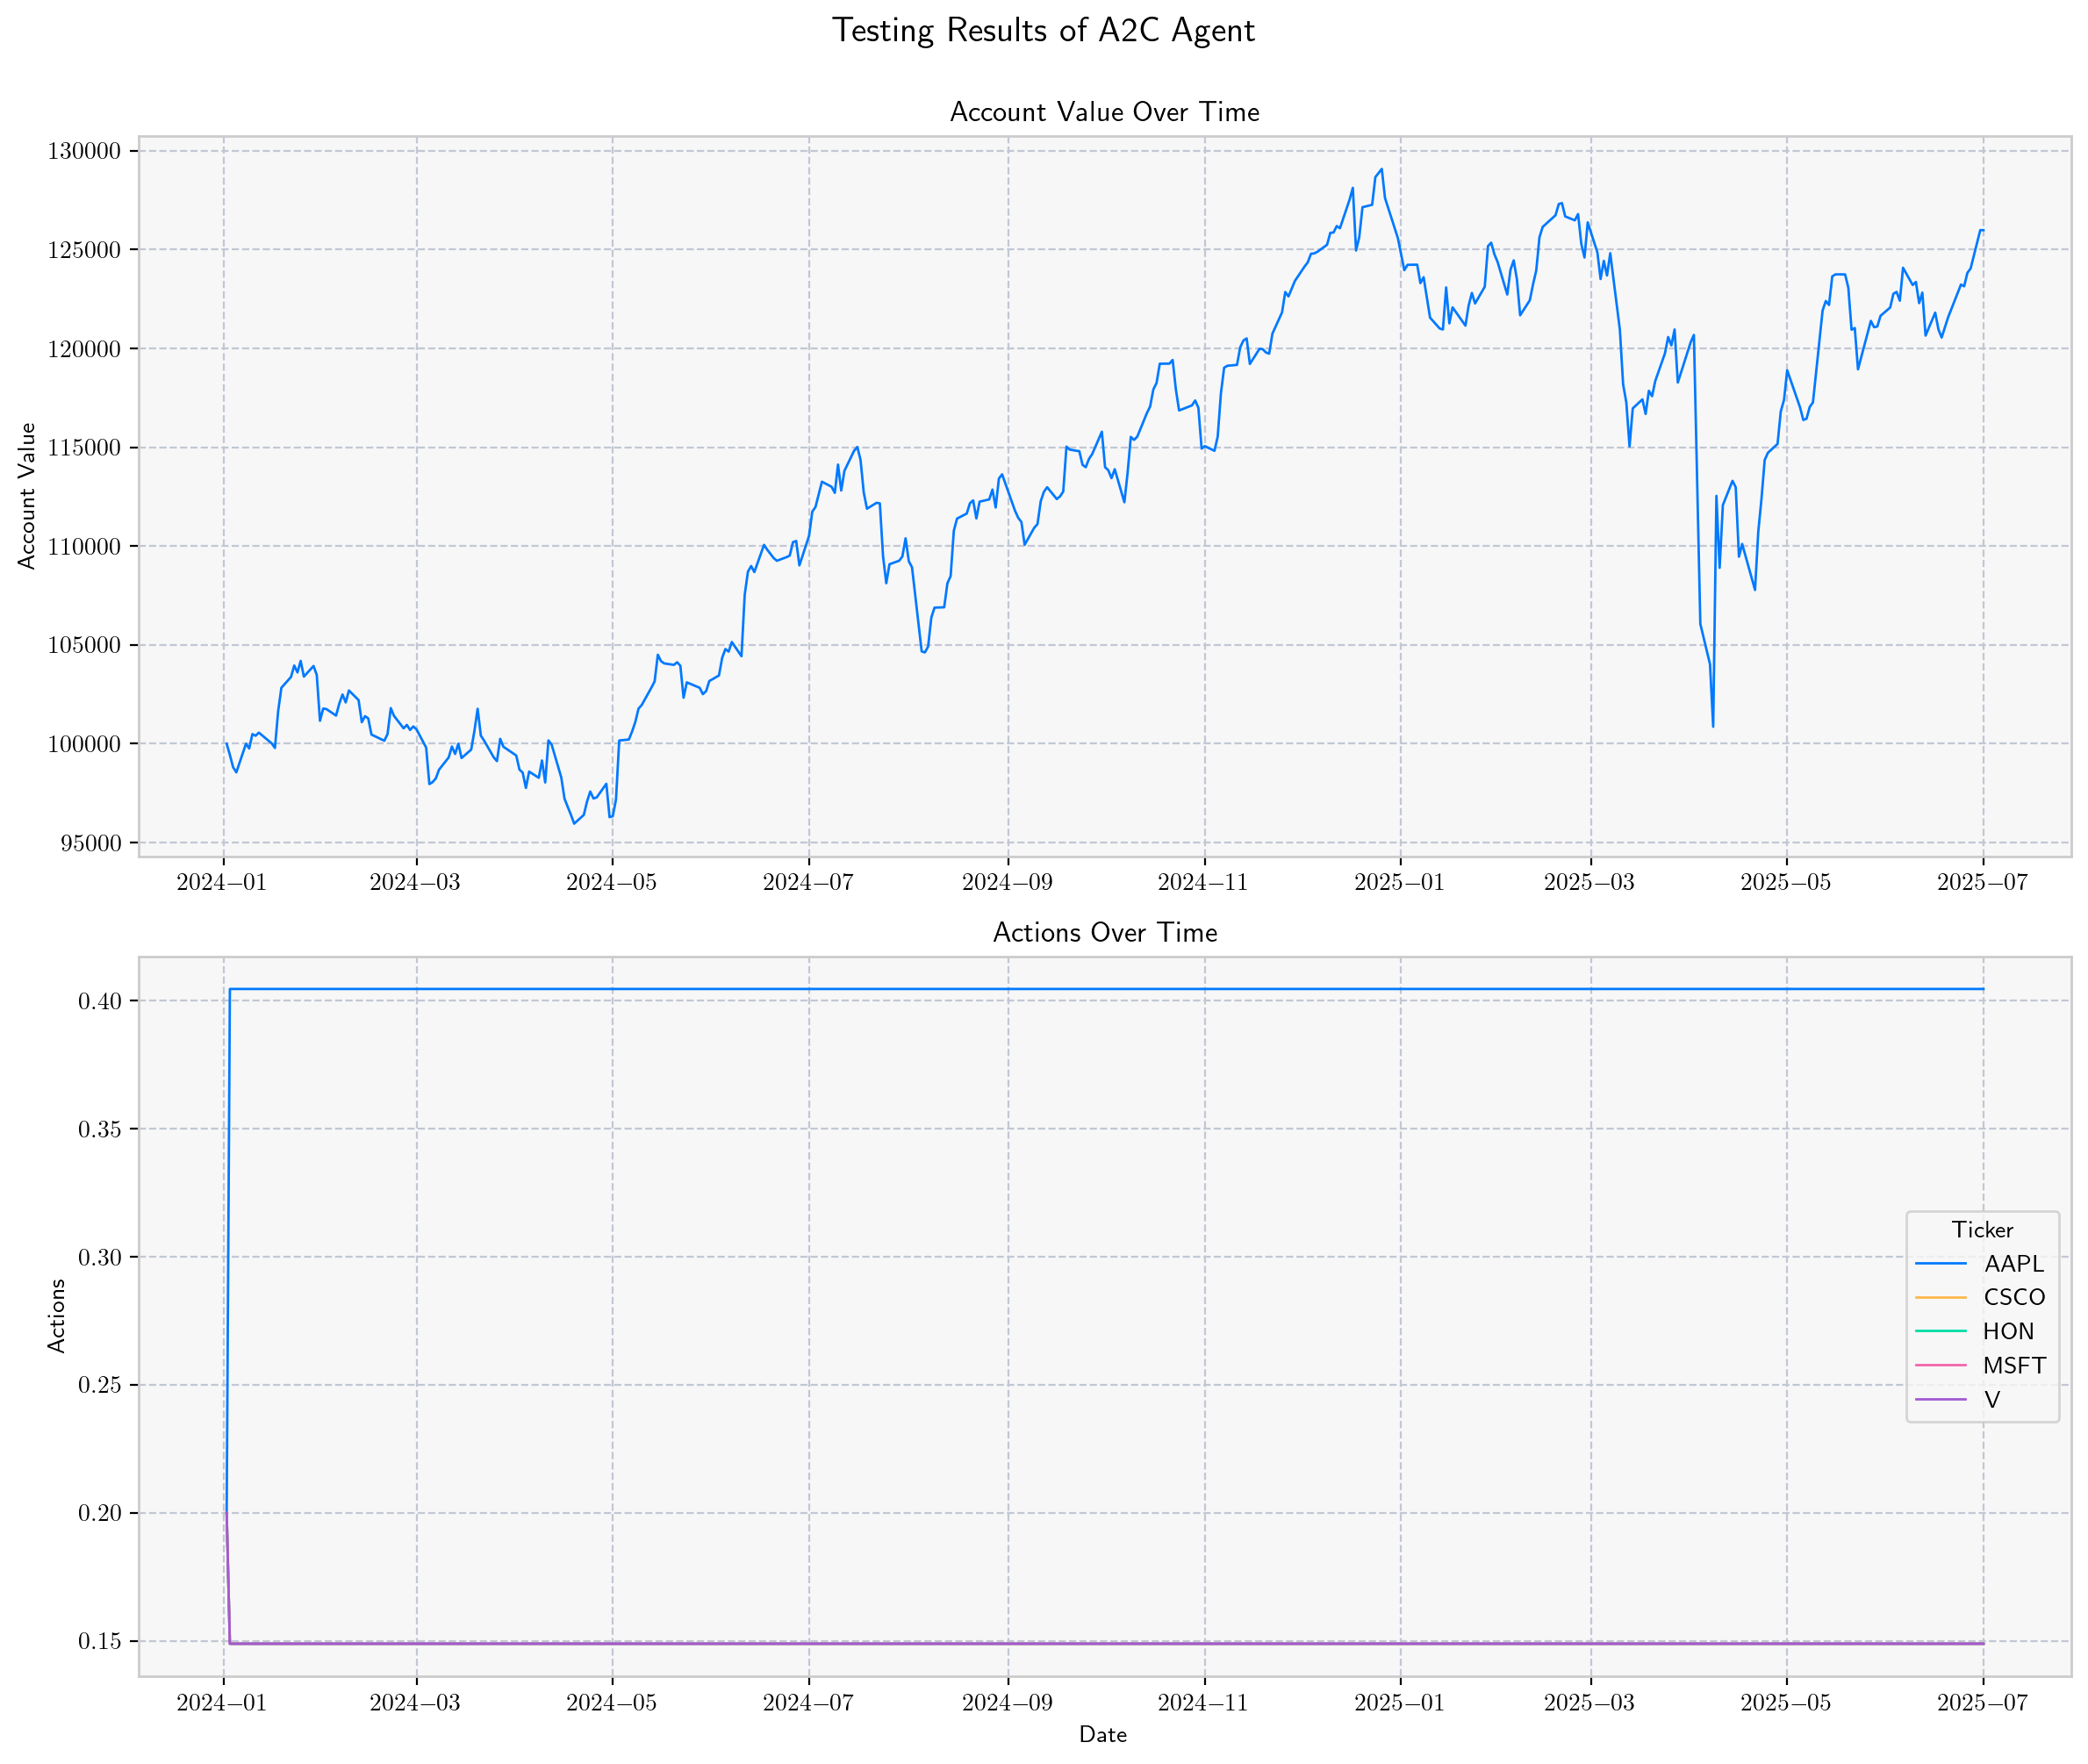

In [ ]:
model_name = "a2c"
perform_model_sweep(model_name)

## PPO


Create sweep with ID: 4ryktjbo
Sweep URL: https://wandb.ai/xdl-team/xdl-portfolio/sweeps/4ryktjbo


wandb: Agent Starting Run: bajsistz with config:
wandb: 	batch_size: 128
wandb: 	ent_coef: 0.0007191935706532528
wandb: 	learning_rate: 0.0068610996622006344
wandb: 	n_steps: 2048


wandb: Agent Starting Run: 1i1rcxqy with config:
wandb: 	batch_size: 32
wandb: 	ent_coef: 0.000946058061033699
wandb: 	learning_rate: 0.00911627300726247
wandb: 	n_steps: 256


wandb: Agent Starting Run: 0hzirqg0 with config:
wandb: 	batch_size: 128
wandb: 	ent_coef: 0.00022906273556849312
wandb: 	learning_rate: 0.0038183467562810137
wandb: 	n_steps: 256


wandb: Agent Starting Run: mo1xjozl with config:
wandb: 	batch_size: 32
wandb: 	ent_coef: 0.0008737578969541403
wandb: 	learning_rate: 0.00017727935141678133
wandb: 	n_steps: 2048


wandb: Agent Starting Run: nkv1utmt with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.000802964947542412
wandb: 	learning_rate: 0.001051233776390051
wandb: 	n_steps: 256


wandb: Agent Starting Run: pjtm961l with config:
wandb: 	batch_size: 256
wandb: 	ent_coef: 0.0004436090978547982
wandb: 	learning_rate: 0.009074949365474693
wandb: 	n_steps: 256


wandb: Agent Starting Run: iyj2u74g with config:
wandb: 	batch_size: 32
wandb: 	ent_coef: 0.0003880938022808856
wandb: 	learning_rate: 0.007649872376291797
wandb: 	n_steps: 256


wandb: Agent Starting Run: pormc2on with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.00047409555279474255
wandb: 	learning_rate: 0.005583006877294782
wandb: 	n_steps: 256


wandb: Agent Starting Run: j1awj1qy with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.0006054703601070979
wandb: 	learning_rate: 0.0038174670872811022
wandb: 	n_steps: 2048


wandb: Agent Starting Run: nqwt2ilr with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.00027142019601059624
wandb: 	learning_rate: 0.003613672844965664
wandb: 	n_steps: 512


wandb: Agent Starting Run: vuc85mkq with config:
wandb: 	batch_size: 32
wandb: 	ent_coef: 0.0002963205972703512
wandb: 	learning_rate: 0.002610116534617598
wandb: 	n_steps: 256


wandb: Agent Starting Run: ckdyzkcz with config:
wandb: 	batch_size: 256
wandb: 	ent_coef: 0.00015140063007604583
wandb: 	learning_rate: 0.006050539816680357
wandb: 	n_steps: 1024


wandb: Agent Starting Run: nn2fpbsm with config:
wandb: 	batch_size: 64
wandb: 	ent_coef: 0.0007319445595400702
wandb: 	learning_rate: 0.008248168979525293
wandb: 	n_steps: 128


wandb: Agent Starting Run: fh46kw5u with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.00014490585239187358
wandb: 	learning_rate: 0.0051055961365763045
wandb: 	n_steps: 1024


wandb: Agent Starting Run: v47n8eyd with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.0009416985174227448
wandb: 	learning_rate: 0.0003243572245019292
wandb: 	n_steps: 256


wandb: Agent Starting Run: iert9atw with config:
wandb: 	batch_size: 64
wandb: 	ent_coef: 0.0004481795199103313
wandb: 	learning_rate: 0.0015886334416518651
wandb: 	n_steps: 512


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zf515275 with config:
wandb: 	batch_size: 512
wandb: 	ent_coef: 0.0005585611467121732
wandb: 	learning_rate: 0.008641523102365564
wandb: 	n_steps: 256


wandb: Agent Starting Run: 61mqc52a with config:
wandb: 	batch_size: 256
wandb: 	ent_coef: 0.0008722102257377767
wandb: 	learning_rate: 0.005654693866460073
wandb: 	n_steps: 128


wandb: Agent Starting Run: lu8du3aa with config:
wandb: 	batch_size: 32
wandb: 	ent_coef: 0.00026467528878855657
wandb: 	learning_rate: 0.00582273823014015
wandb: 	n_steps: 512


wandb: Agent Starting Run: nzinnv88 with config:
wandb: 	batch_size: 128
wandb: 	ent_coef: 0.0004522917883195867
wandb: 	learning_rate: 0.009998867006455777
wandb: 	n_steps: 1024


Best run configuration:
	n_steps: 512
	ent_coef: 0.000448
	learning_rate: 0.001589
	batch_size: 64
Best run metrics:
	sharpe_ratio: 2.2710
	cumulative_return: 0.3783
Environment successfully created with 
	Stock dimension: 5 
	State space: 4
Model arguments: {'n_steps': 512, 'ent_coef': 0.0004481795199103313, 'learning_rate': 0.0015886334416518651, 'batch_size': 64}
Using cpu device
Training model: PPO
day: 2011, episode: 10
begin_total_asset:100000.00
end_total_asset:433420.28
sharpe_ratio: 0.95
day: 2011, episode: 20
begin_total_asset:100000.00
end_total_asset:403406.43
sharpe_ratio: 0.92
day: 2011, episode: 30
begin_total_asset:100000.00
end_total_asset:428249.41
sharpe_ratio: 0.96
day: 2011, episode: 40
begin_total_asset:100000.00
end_total_asset:415132.17
sharpe_ratio: 0.95
day: 2011, episode: 50
begin_total_asset:100000.00
end_total_asset:404177.59
sharpe_ratio: 0.92
Saving model: PPO
Model saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/models/portfolio-

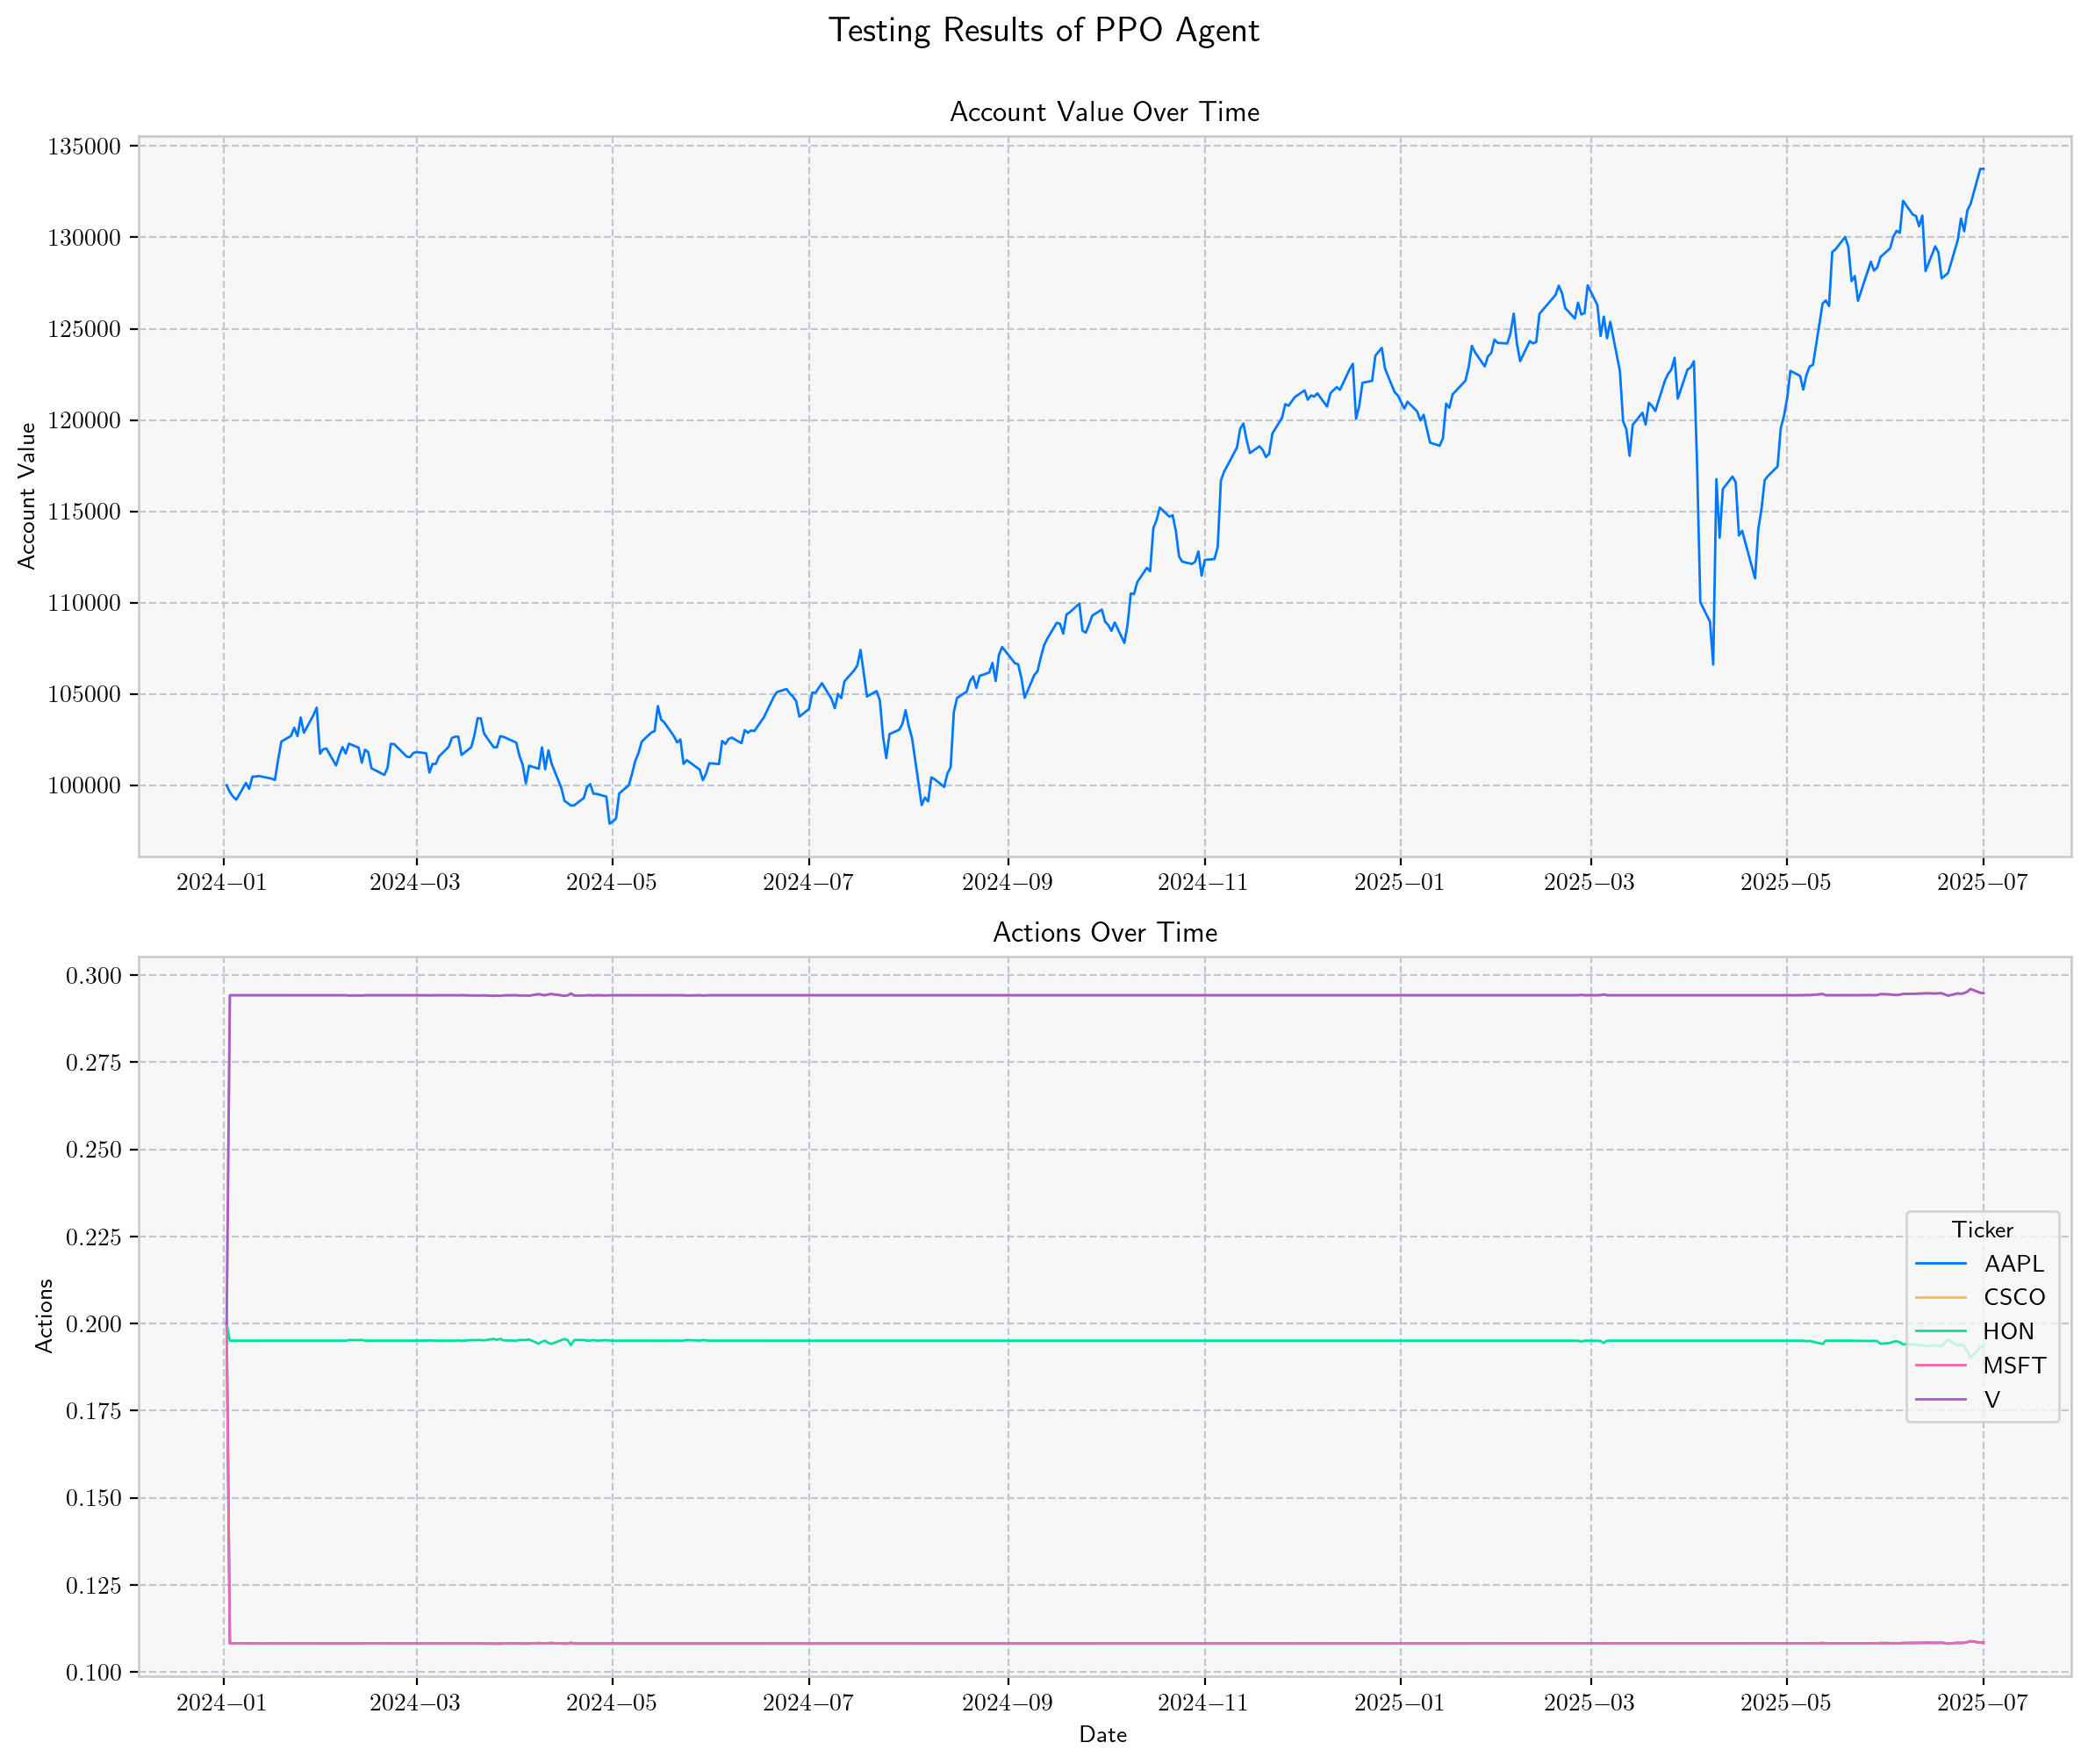

In [ ]:
model_name = "ppo"
perform_model_sweep(model_name)

## DDPG


Create sweep with ID: kme05ffi
Sweep URL: https://wandb.ai/xdl-team/xdl-portfolio/sweeps/kme05ffi


wandb: Agent Starting Run: m6c6y82c with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.0033518706980544097


wandb: Agent Starting Run: lg9xtwtl with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 100000
wandb: 	learning_rate: 0.0028260763108600073


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7i5c5gze with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.001199985115793615


wandb: Agent Starting Run: yf4js9by with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 200000
wandb: 	learning_rate: 0.002257206699896524


wandb: Agent Starting Run: o9ggfr94 with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.001780370643386125


wandb: Agent Starting Run: e2b2eacj with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.0031171608676403436


wandb: Agent Starting Run: ldy175ys with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.00123502244284029


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2oy5sj2j with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.0007242552819282043


wandb: Agent Starting Run: n9pyag9q with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.008221047154716034


wandb: Agent Starting Run: 7xkl6q00 with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.002266200203125388


wandb: Agent Starting Run: 1ac1ci5m with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 100000
wandb: 	learning_rate: 0.003446327111933304


wandb: Agent Starting Run: r652lgzq with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.005646332185493655


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4j3j3zoi with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 200000
wandb: 	learning_rate: 0.0013797991227526855


wandb: Agent Starting Run: 5sqik4gg with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.003580199946746007


wandb: Agent Starting Run: uf1nd8nb with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 100000
wandb: 	learning_rate: 0.002256236949610976


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0wdzrjq8 with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 200000
wandb: 	learning_rate: 0.009212037458371172


wandb: Agent Starting Run: 3gz9kty3 with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 50000
wandb: 	learning_rate: 0.00698974966835779


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: t5z5o1wr with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 100000
wandb: 	learning_rate: 0.008407897048704378


wandb: Agent Starting Run: xb47edx3 with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 100000
wandb: 	learning_rate: 0.0009252558878392184


wandb: Agent Starting Run: 57rbubn6 with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 200000
wandb: 	learning_rate: 0.005097424498144161


Best run configuration:
	batch_size: 256
	buffer_size: 200000
	learning_rate: 0.005097
Best run metrics:
	sharpe_ratio: 2.2441
	cumulative_return: 0.4002
Environment successfully created with 
	Stock dimension: 5 
	State space: 4
Model arguments: {'batch_size': 256, 'buffer_size': 200000, 'learning_rate': 0.005097424498144161}
Using cpu device
Training model: DDPG
day: 2011, episode: 10
begin_total_asset:100000.00
end_total_asset:466473.91
sharpe_ratio: 1.00
day: 2011, episode: 20
begin_total_asset:100000.00
end_total_asset:466473.91
sharpe_ratio: 1.00
day: 2011, episode: 30
begin_total_asset:100000.00
end_total_asset:466473.91
sharpe_ratio: 1.00
day: 2011, episode: 40
begin_total_asset:100000.00
end_total_asset:466473.91
sharpe_ratio: 1.00
day: 2011, episode: 50
begin_total_asset:100000.00
end_total_asset:466473.91
sharpe_ratio: 1.00
Saving model: DDPG
Model saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/models/portfolio-optimisation/test/simple-dataset/ddpg


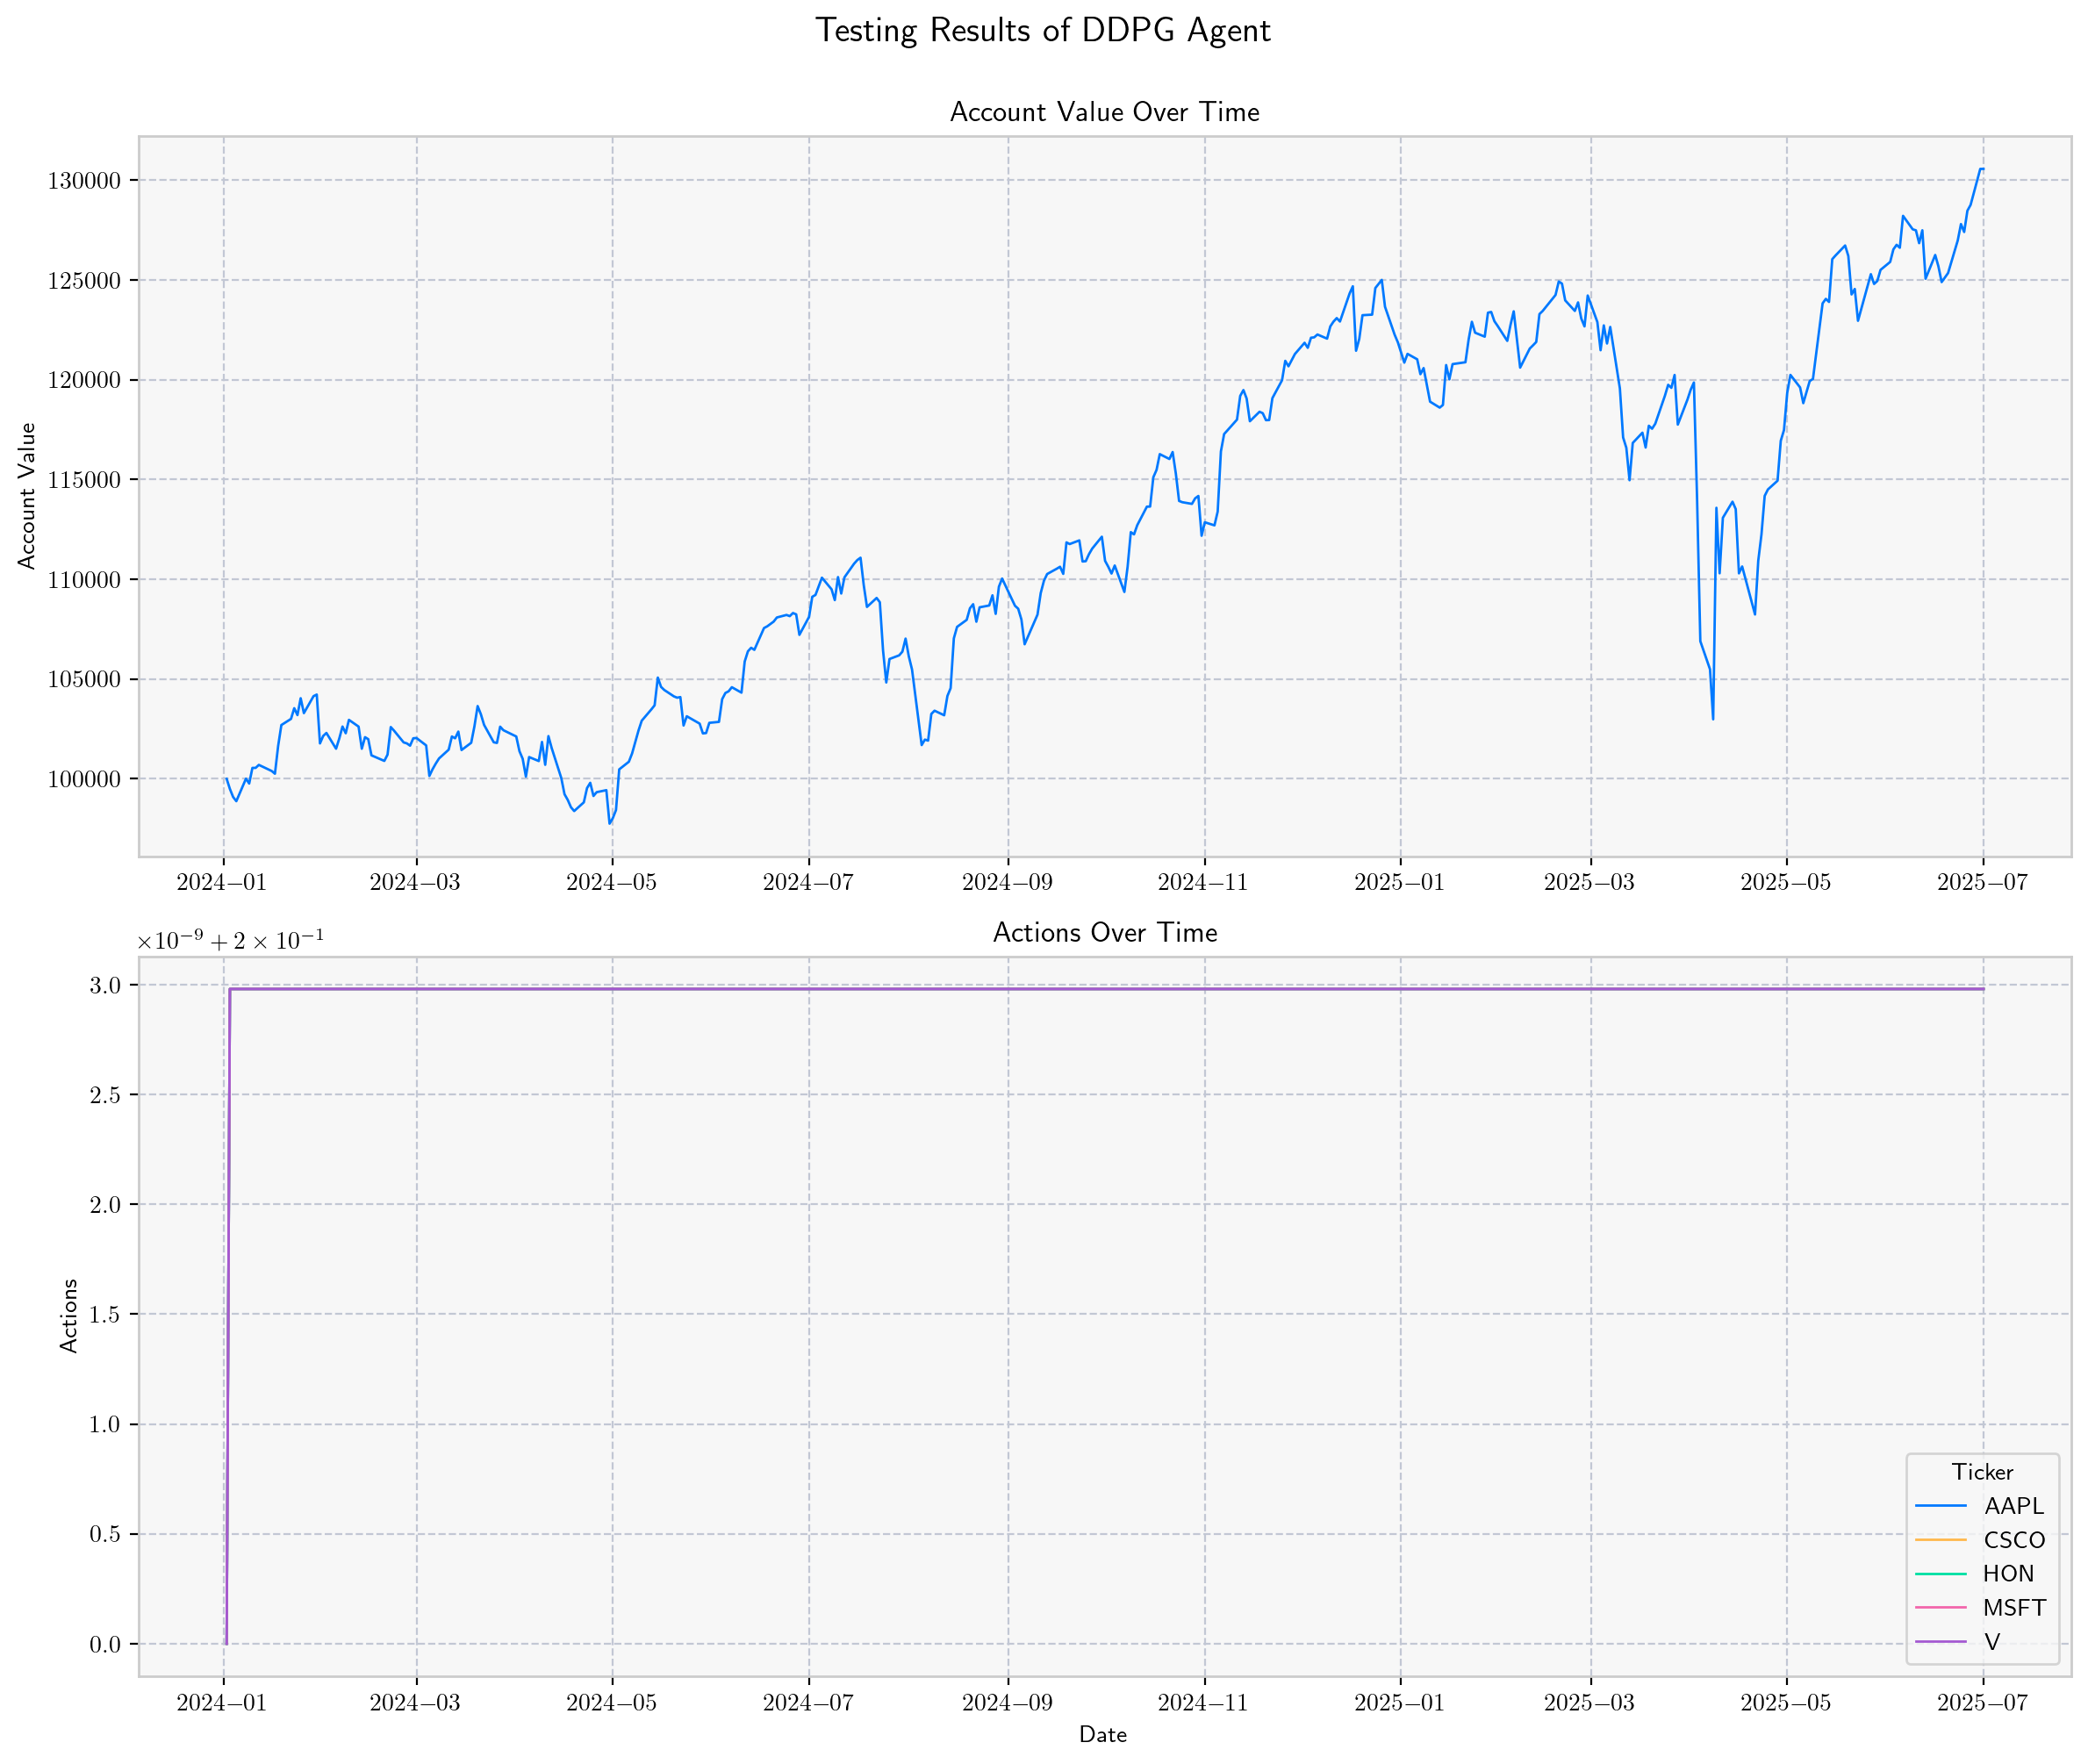

In [ ]:
model_name = "ddpg"
perform_model_sweep(model_name)

## TD3


Create sweep with ID: ikvvq4qs
Sweep URL: https://wandb.ai/xdl-team/xdl-portfolio/sweeps/ikvvq4qs


wandb: Agent Starting Run: ik0zxdz6 with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 2000000
wandb: 	learning_rate: 0.005863889568729557


wandb: Agent Starting Run: czi55pqk with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 2000000
wandb: 	learning_rate: 0.0002915064711346872


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x7wz7vdd with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.0017407508290842788


wandb: Agent Starting Run: e07a387x with config:
wandb: 	batch_size: 100
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.008819695606580772


wandb: Agent Starting Run: cw62edqm with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 2000000
wandb: 	learning_rate: 0.0014862221330177855


wandb: Agent Starting Run: qhiryu1v with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.006936804511434598


wandb: Agent Starting Run: z5lztvox with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.009197969529011234


wandb: Agent Starting Run: qigog3gr with config:
wandb: 	batch_size: 100
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.002435700727848339


wandb: Agent Starting Run: 11w0vyrq with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.001686993026464164


wandb: Agent Starting Run: 0ukbztqc with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.0038630271093721344


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0wfq77wh with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 2000000
wandb: 	learning_rate: 0.006833854277824689


wandb: Agent Starting Run: bw88qwyy with config:
wandb: 	batch_size: 100
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.0029223423228130025


wandb: Agent Starting Run: o8jbdtcd with config:
wandb: 	batch_size: 100
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.00175644414024048


wandb: Agent Starting Run: qw159n87 with config:
wandb: 	batch_size: 100
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.00930420420756113


wandb: Agent Starting Run: yq6ghr11 with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.0035622395934022623


wandb: Agent Starting Run: hcor2i74 with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 500000
wandb: 	learning_rate: 0.005125480172784314


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: z54qhm5v with config:
wandb: 	batch_size: 256
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.002978320812861366


wandb: Agent Starting Run: hl04f9vv with config:
wandb: 	batch_size: 100
wandb: 	buffer_size: 2000000
wandb: 	learning_rate: 0.009474298534991267


wandb: Agent Starting Run: kq4yf80c with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 2000000
wandb: 	learning_rate: 0.005788717014296619


wandb: Agent Starting Run: oxxuy9ql with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 1000000
wandb: 	learning_rate: 0.0006015351289324795


Best run configuration:
	batch_size: 128
	buffer_size: 500000
	learning_rate: 0.001687
Best run metrics:
	sharpe_ratio: 2.2441
	cumulative_return: 0.4002
Environment successfully created with 
	Stock dimension: 5 
	State space: 4
Model arguments: {'batch_size': 128, 'buffer_size': 500000, 'learning_rate': 0.001686993026464164}
Using cpu device
Training model: TD3
day: 2011, episode: 10
begin_total_asset:100000.00
end_total_asset:504721.43
sharpe_ratio: 1.02
day: 2011, episode: 20
begin_total_asset:100000.00
end_total_asset:504721.43
sharpe_ratio: 1.02
day: 2011, episode: 30
begin_total_asset:100000.00
end_total_asset:504721.43
sharpe_ratio: 1.02
day: 2011, episode: 40
begin_total_asset:100000.00
end_total_asset:504721.43
sharpe_ratio: 1.02
day: 2011, episode: 50
begin_total_asset:100000.00
end_total_asset:504721.43
sharpe_ratio: 1.02
Saving model: TD3
Model saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/models/portfolio-optimisation/test/simple-dataset/td3
Eva

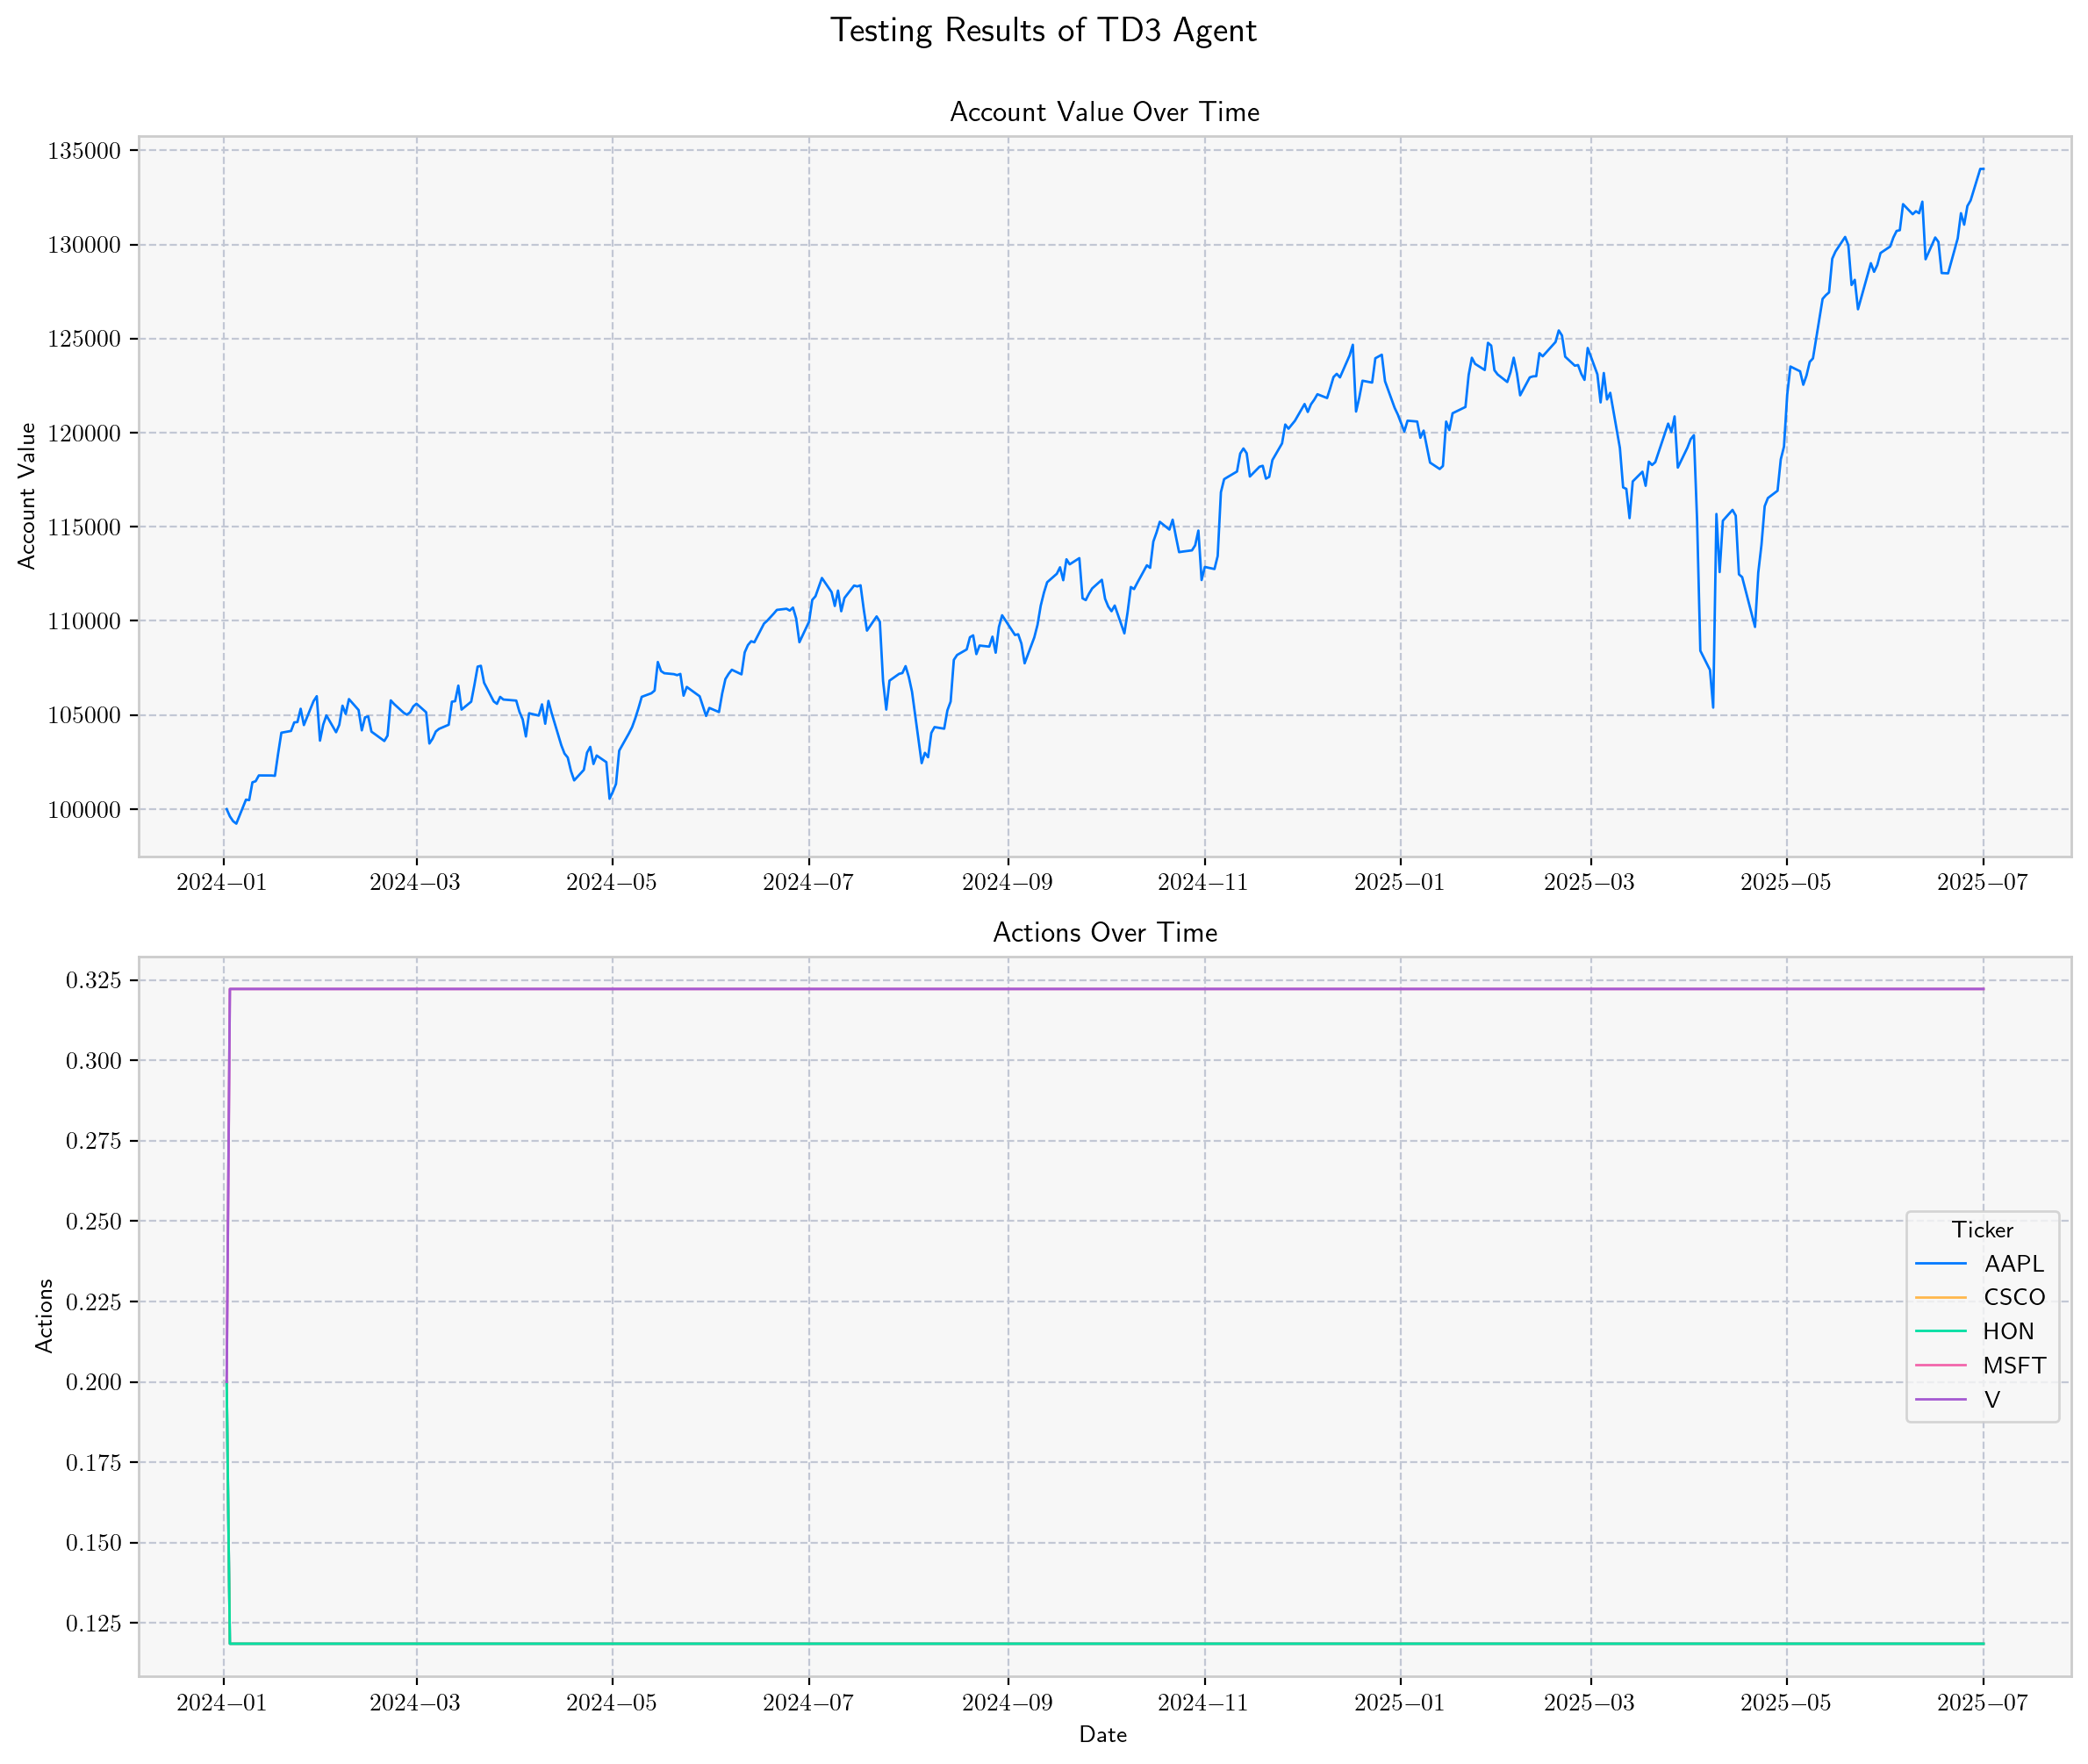

In [ ]:
model_name = "td3"
perform_model_sweep(model_name)

## SAC


Create sweep with ID: cf3iqul9
Sweep URL: https://wandb.ai/xdl-team/xdl-portfolio/sweeps/cf3iqul9


wandb: Agent Starting Run: 3epb5gte with config:
wandb: 	batch_size: 64
wandb: 	buffer_size: 500000
wandb: 	ent_coef: auto_0.1
wandb: 	learning_rate: 0.001108583620591323
wandb: 	learning_starts: 2000


wandb: Agent Starting Run: aimnxkui with config:
wandb: 	batch_size: 32
wandb: 	buffer_size: 1000000
wandb: 	ent_coef: auto_0.01
wandb: 	learning_rate: 0.00357086490091035
wandb: 	learning_starts: 2000


Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run aimnxkui errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run 2ojpdkdj errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run nwlr8ifm errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

wandb: Agent Starting Run: u37k8mit with config:
wandb: 	batch_size: 32
wandb: 	buffer_size: 2000000
wandb: 	ent_coef: auto_0.01
wandb: 	learning_rate: 0.001426575382078425
wandb: 	learning_starts: 500


wandb: Agent Starting Run: hg52t0c7 with config:
wandb: 	batch_size: 128
wandb: 	buffer_size: 2000000
wandb: 	ent_coef: auto_0.1
wandb: 	learning_rate: 0.008703352867857922
wandb: 	learning_starts: 5000


Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run hg52t0c7 errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run sxn38oor errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run 5liqvrnd errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run em7g6l9x errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run fcopv6ze errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run rqpeyjoy errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run zr3r2x9m errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run lm70emo0 errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run oh00nvpp errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run wp48xeuv errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

wandb: Network error (ConnectionError), entering retry loop.


wandb: Agent Starting Run: mx2z8hwm with config:
wandb: 	batch_size: 32
wandb: 	buffer_size: 2000000
wandb: 	ent_coef: auto
wandb: 	learning_rate: 0.003744377481973852
wandb: 	learning_starts: 5000


Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run mx2z8hwm errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Traceback (most recent call last):
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
    trained_model = agent.train(
                    ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
    model = model.learn(
            ^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/sac/sac.py", line 308, in learn
    return super().learn(
           ^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm.py", line 328, in learn
    rollout = self.collect_rollouts(
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/stable_baselines3/common/off_policy_algorithm

wandb: ERROR Run 03rykt2q errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/.venv/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 302, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 125, in <lambda>
wandb: ERROR     lambda model_name=model_name: self.wandb_train(model_name),
wandb: ERROR                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/optimisation/wandb_opt.py", line 85, in wandb_train
wandb: ERROR     trained_model = agent.train(
wandb: ERROR                     ^^^^^^^^^^^^
wandb: ERROR   File "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/agents/drl_agent.py", line 114, in train
wandb: ERROR     model = model.learn(
wandb: ERROR             ^^^^^^^^^

Best run configuration:
	batch_size: 64
	buffer_size: 500000
	learning_rate: 0.001109
	learning_starts: 2000
	ent_coef: auto_0.1
Best run metrics:
	sharpe_ratio: 2.1231
	cumulative_return: 0.3382
Environment successfully created with 
	Stock dimension: 5 
	State space: 4
Model arguments: {'batch_size': 64, 'buffer_size': 500000, 'learning_rate': 0.001108583620591323, 'learning_starts': 2000, 'ent_coef': 'auto_0.1'}
Using cpu device
Training model: SAC
day: 2011, episode: 10
begin_total_asset:100000.00
end_total_asset:474276.10
sharpe_ratio: 0.99
day: 2011, episode: 20
begin_total_asset:100000.00
end_total_asset:488780.13
sharpe_ratio: 1.01
day: 2011, episode: 30
begin_total_asset:100000.00
end_total_asset:542433.73
sharpe_ratio: 1.06
day: 2011, episode: 40
begin_total_asset:100000.00
end_total_asset:516290.43
sharpe_ratio: 1.04
day: 2011, episode: 50
begin_total_asset:100000.00
end_total_asset:513566.95
sharpe_ratio: 1.03
Saving model: SAC
Model saved to /Users/ingridperez/Documents/Gi

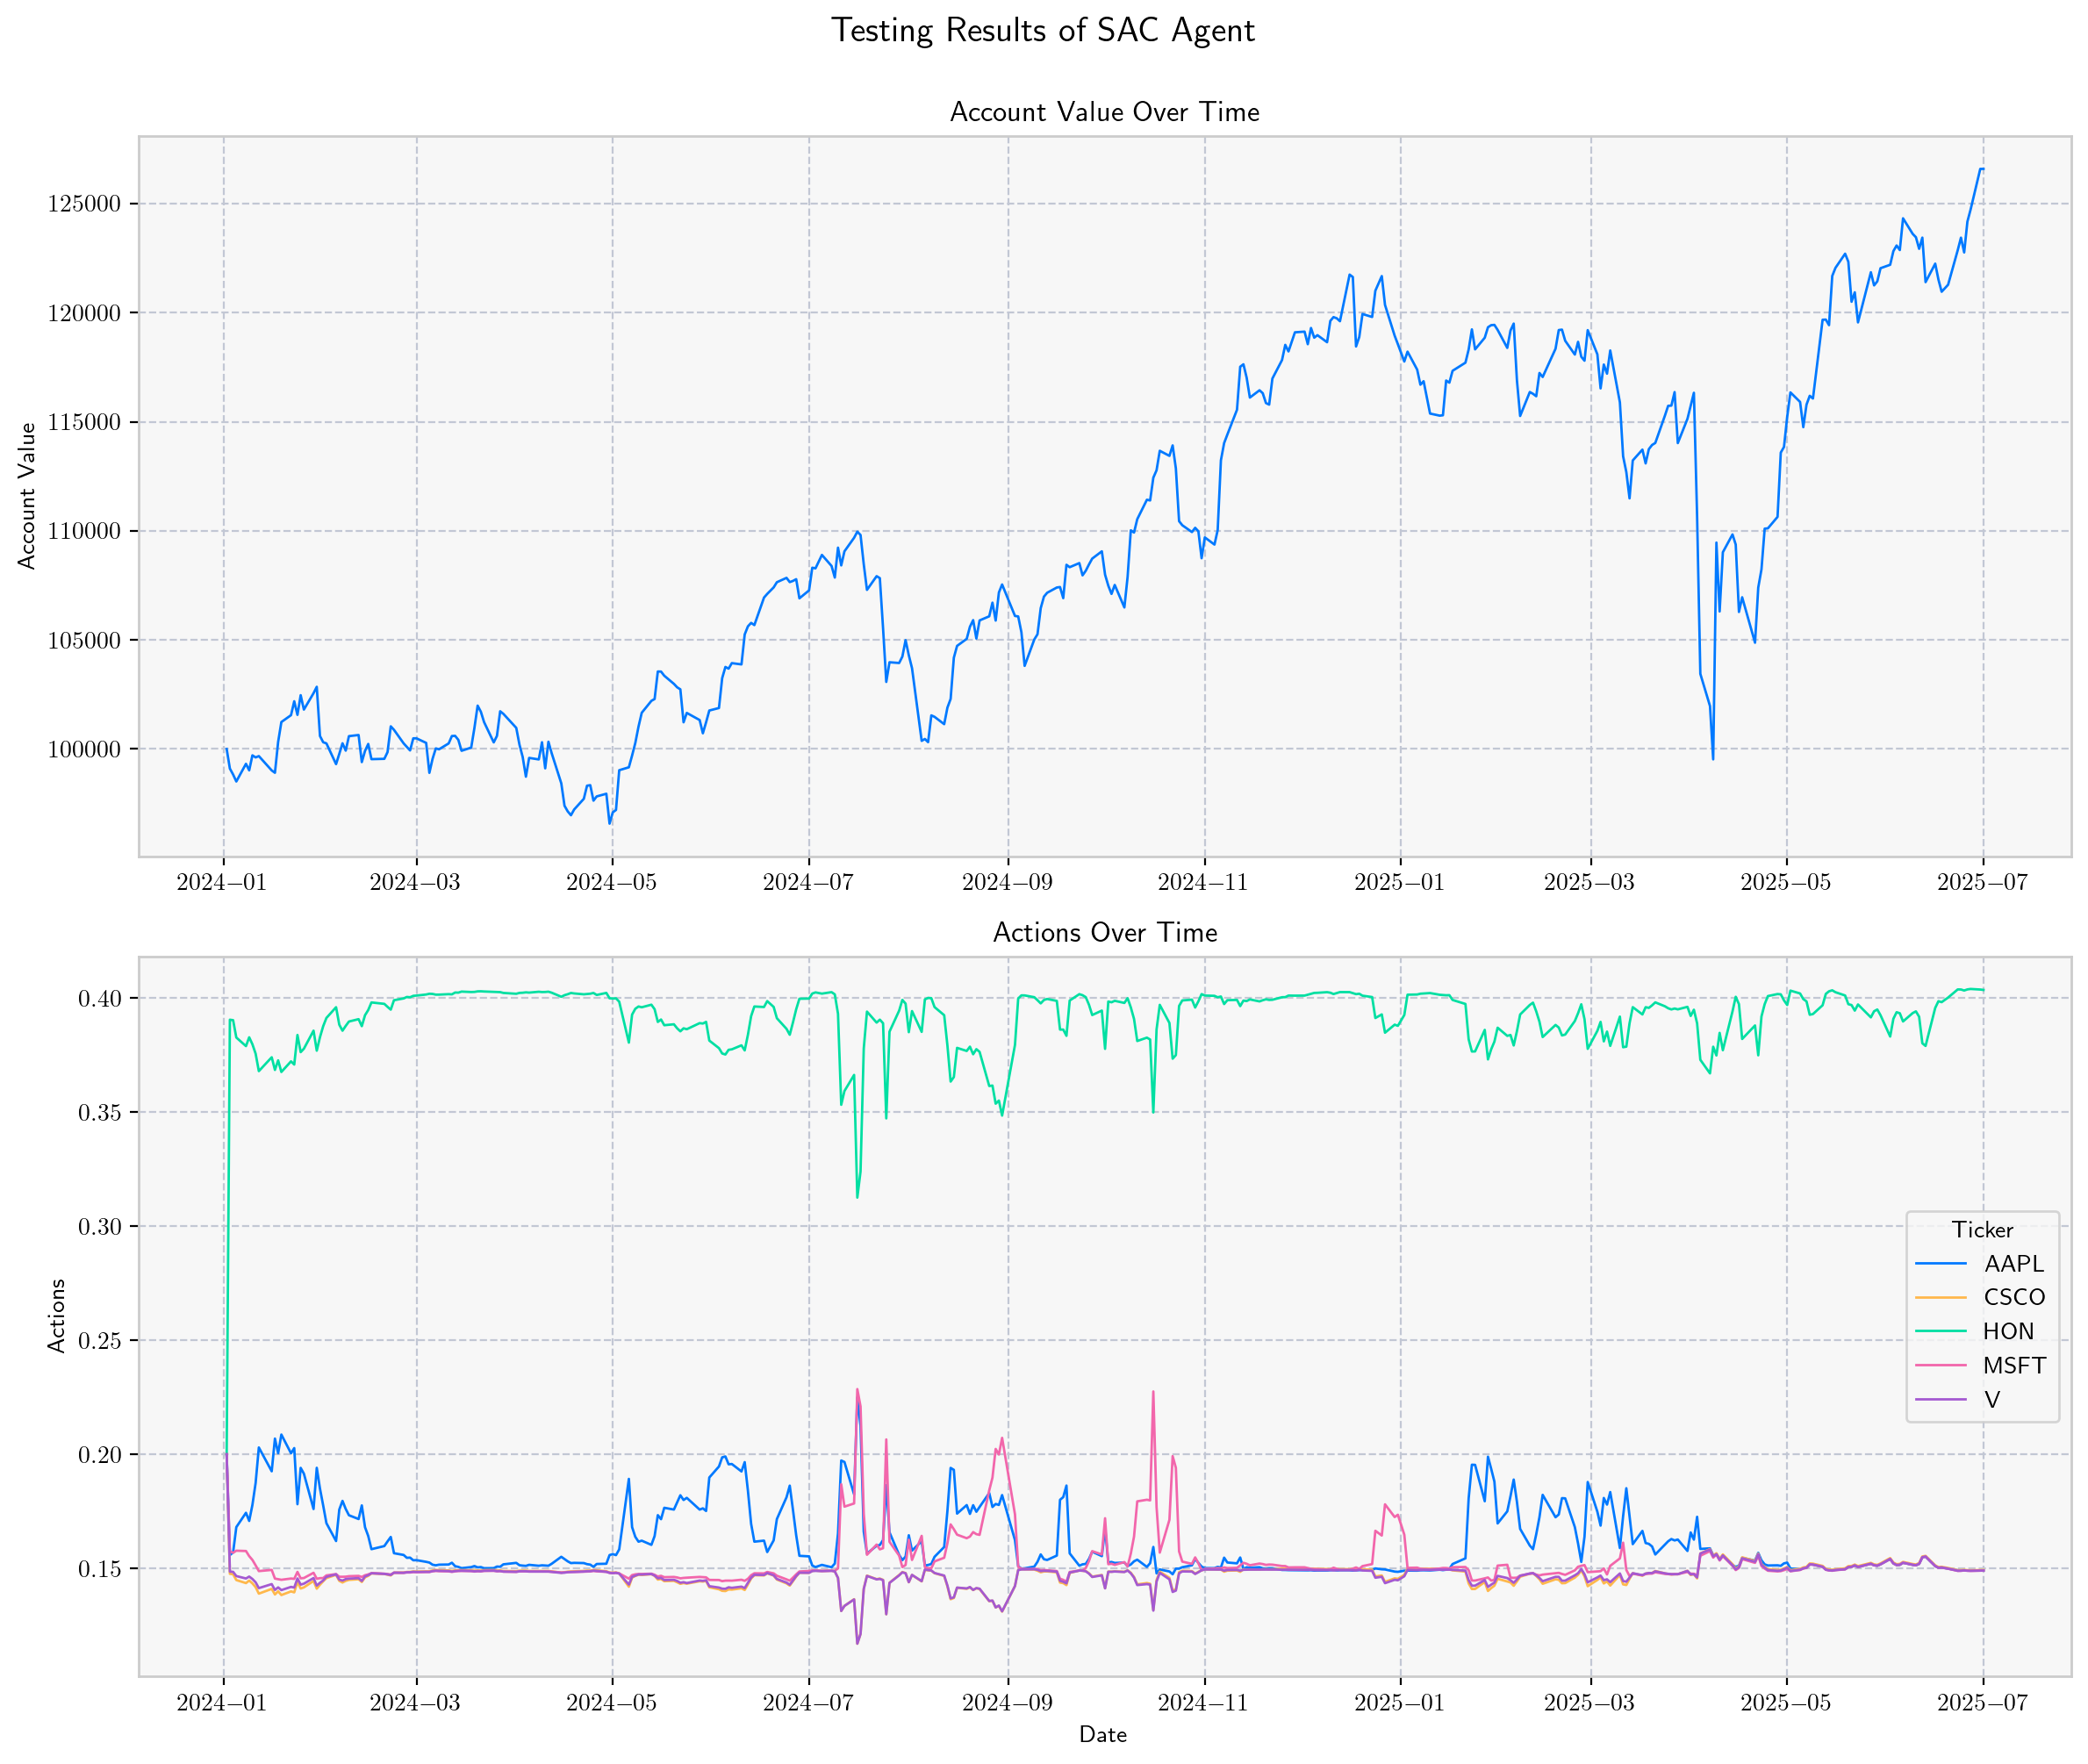

In [ ]:
model_name = "sac"
perform_model_sweep(model_name)